<a href="https://colab.research.google.com/github/samarth-nand/Projects-Code-work/blob/main/Face_reg_Nearest_Neigbour_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem 4. Nearest Neighbor Classification**


### **Data Initialization**



In [ ]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot
from numpy.linalg import norm

(X_train, y_train), (X_test,y_test) = mnist.load_data()

X_train = X_train[:600,:,:].astype("float32")/255 # Scale images to the [0,1] range
y_train = y_train[:600]
N_train = X_train.shape[0]
X_train = X_train.reshape((N_train,28*28))

X_test = X_test[:100,:,:].astype("float32")/255 # Scale images to the [0,1] range
y_test = y_test[:100]
N_test = X_test.shape[0]
X_test = X_test.reshape((N_test,28*28))

print("Trainset X shape: " + str(X_train.shape))
print("train label y shape: " + str(y_train.shape))
print("Testset X shape: " + str(X_test.shape))
print("test label y shape: " + str(y_test.shape))

11490434/11490434 [==============================] - 1s 0us/step
Trainset X shape: (600, 784)
train label y shape: (600,)
Testset X shape: (100, 784)
test label y shape: (100,)


**4.1 (1/5) Data Visualization**
Please use this provided function to solve 4.1

In [ ]:
def visualization(idx_lst,data,label):
  '''
  This function is used to visualize original dataset X or cluster representative matrix Z
  '''
  N = data.shape[0]
  for idx in idx_lst:
    pyplot.imshow(data.reshape((N,28,28))[idx], cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    print("The corresponding label of this image is {}".format(label[idx]))

Example: visualize the first two images in the trainset:

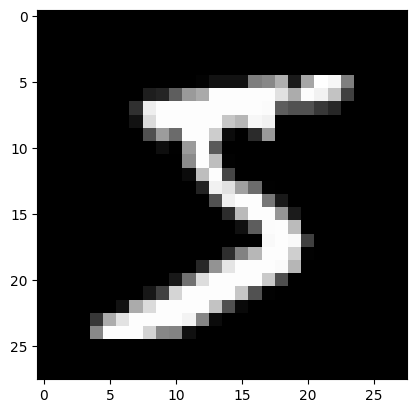

The corresponding label of this image is 5


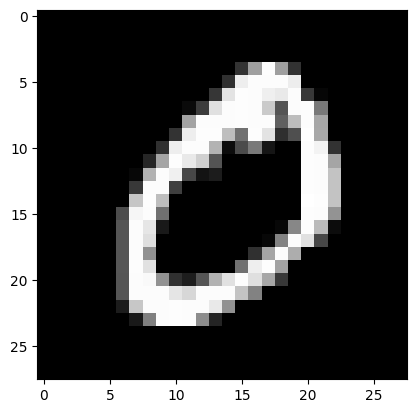

The corresponding label of this image is 0


In [ ]:
visualization(np.arange(2),X_train,y_train)

Alternative way for the above example:

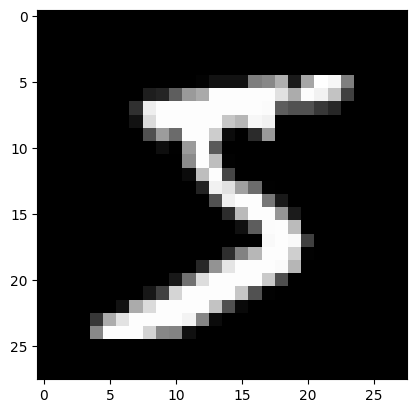

The corresponding label of this image is 5


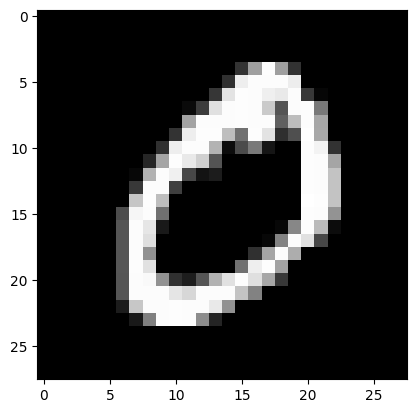

The corresponding label of this image is 0


In [ ]:
visualization([0,1],X_train,y_train)

**Visualize the first and third images (row vectors) in X_train: TODO**

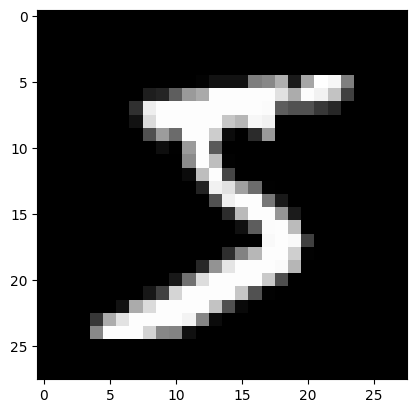

The corresponding label of this image is 5


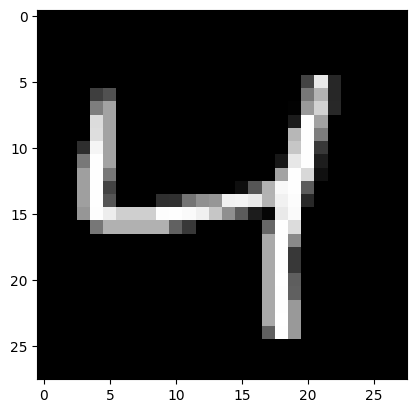

The corresponding label of this image is 4


In [ ]:
###### YOUR CODE STARTS HERE ######
visualization([0,2],X_train,y_train)
###################################

**Visualize the last 5 images (row vectors) in X_test: TODO**

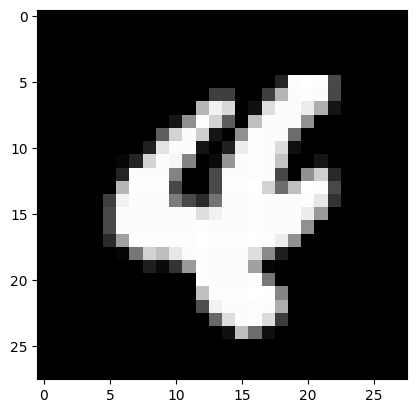

The corresponding label of this image is 4


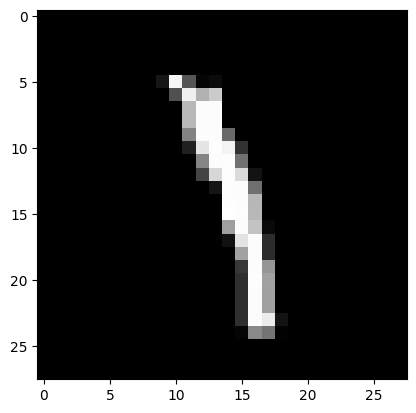

The corresponding label of this image is 1


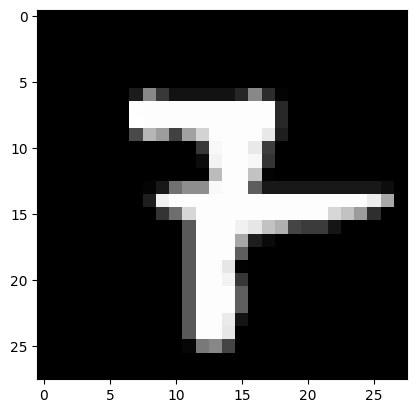

The corresponding label of this image is 7


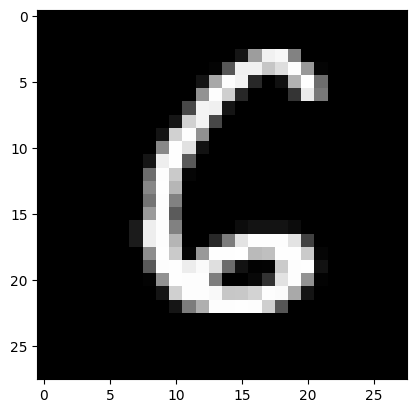

The corresponding label of this image is 6


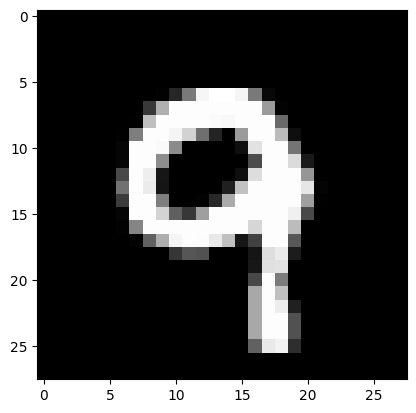

The corresponding label of this image is 9


In [ ]:
###### YOUR CODE STARTS HERE ######
visualization(np.arange(95,100), X_test, y_test)
###################################

**Write down their corresponding labels here: TODO**

4 ,1 ,7, 6, 9


**4.2 (1.5/5) Distance Calculation**
These three vectors represents three images

In [ ]:
v1 = X_train[1]
v2 = X_train[8]
w = X_test[5]
print(v1.shape)
print(w.shape)

(784,)
(784,)


Visualization them (in the order of v1, v2, w):

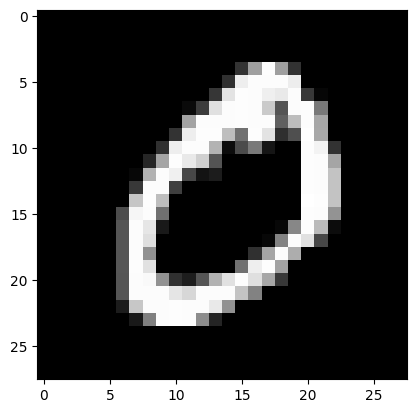

The corresponding label of this image is 0


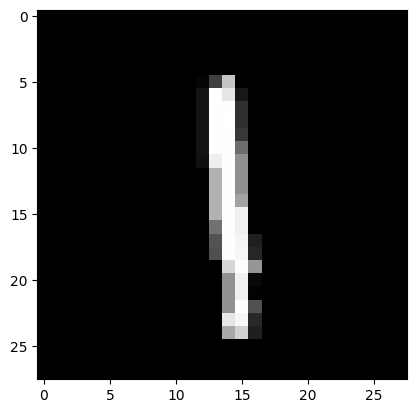

The corresponding label of this image is 1


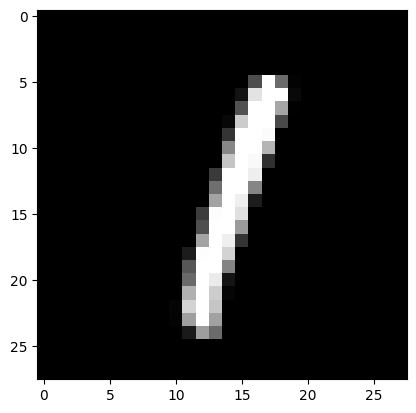

The corresponding label of this image is 1


In [ ]:
visualization([1,8],X_train,y_train)
visualization([5],X_test,y_test)

**Calculate distances between (1) v1 and w; (2) v2 and w: TODO**

In [ ]:
###### YOUR CODE STARTS HERE ######
dist1 = np.linalg.norm(v1-w)
dist2 = np.linalg.norm(v2-w)
###################################
print("dist between v1 and w = {}; \ndist between v2 and w = {}".format(dist1,dist2))

dist between v1 and w = 10.470195770263672; 
dist between v2 and w = 7.066826820373535


**What does the comparison of distances tell us? Which two images are likely to be more similar to each other as told by the distances? You can upload the photo of your handwritten answer, or type your answer here directly: TODO**

The comparison of distances explains how similiar or dissimliar these images(v1 or v2) with the image w. In this case the distance between v2 and 2 is smaller therefore v2 is more similar to w than v1 is to w.

**4.3 (2.5/5) KNN Implementation**


**Write your code: TODO**

Validation code

In [ ]:
def knn(X_train,y_train,X_test,y_test,k = 7):
  N_train = X_train.shape[0]
  N_test = X_test.shape[0]
  y_predict = -np.ones((N_test, 1), dtype=int)
  ###### YOUR CODE STARTS HERE ######
  for i in range(N_test):
        x = X_test[i, :]
        d = np.zeros(N_train)

        for j in range(N_train):
            d[j] = np.linalg.norm(x - X_train[j, :])


        k_indices = np.argsort(d)[:k]
        k_labels = y_train[k_indices]
        predicted_label = np.argmax(np.bincount(k_labels))

        # Save the predicted label of the test image
        y_predict[i] = predicted_label
  ###################################
  return y_predict

In [ ]:
# Updated here v1.6
y_predict = knn(X_train,y_train,X_test,y_test,7)
y_predict = y_predict.flatten()
predict_acc = np.sum((y_predict-y_test)==0)/N_test
print("The prediction accuracy = {}%, which should be greater than 80%".format(predict_acc*100))

The prediction accuracy = 83.0%, which should be greater than 80%
